In [185]:
import pandas as pd
import numpy as np


In [186]:
stock_data = pd.read_csv('cleaned_stocks_data.csv')

In [187]:
stock_sentiment = pd.read_csv('stock_sentiment.csv')

In [188]:
stock_data.shape, stock_sentiment.shape

((284, 7), (217, 2))

In [189]:
stock_data.info() , stock_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       284 non-null    object 
 1   Open       284 non-null    float64
 2   High       284 non-null    float64
 3   Low        284 non-null    float64
 4   Close      284 non-null    float64
 5   Adj Close  284 non-null    float64
 6   Volume     284 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             217 non-null    object 
 1   sentiment_score  217 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


(None, None)

In [190]:
import pandas as pd


# Merge on Date
new_df = pd.merge(stock_sentiment, stock_data, on='Date', how='inner')






In [191]:
new_df.shape

(156, 8)

In [192]:
new_df.head()

,Date,sentiment_score,Open,High,Low,Close,Adj Close,Volume
0,2025-05-19,0.959734,207.91,209.48,204.26,208.78,208.78,45310800
1,2025-05-16,0.961058,212.36,212.57,209.77,211.26,211.26,54737900
2,2025-05-15,0.949249,210.95,212.96,209.54,211.45,211.45,45029500
3,2025-05-14,0.940153,212.43,213.94,210.58,212.33,212.33,49325800
4,2025-05-13,0.888783,210.43,213.40,209.00,212.93,212.93,51909300


In [193]:
!pip install tensorflow

In [194]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with these columns:
# 'sentiment_score', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'

# 1. Sort by Date just in case
new_df = new_df.sort_values('Date')

# 2. Select features and target
features = ['sentiment_score', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
target = 'Close'

data = new_df[features].values

# 3. Scale features between 0 and 1 (important for LSTM)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 4. Create sequences of, say, 60 days to predict next day
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, features.index(target)])
    return np.array(X), np.array(y)

SEQ_LEN = 60
X, y = create_sequences(data_scaled, SEQ_LEN)

# 5. Train-test split (e.g. last 20% for test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [230]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=49, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(LSTM(units=49))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=250, batch_size=100, validation_data=(X_test, y_test))


Epoch 1/250


c:\Users\vivek gupta\Desktop\Stock Price Prediction\stock_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2307 - val_loss: 0.0265
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 0.1049 - val_loss: 0.0055
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 0.0393 - val_loss: 0.0285
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 0.0356 - val_loss: 0.0672
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.0649 - val_loss: 0.0772
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 0.0744 - val_loss: 0.0626
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 0.0624 - val_loss: 0.0408
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 0.0450 - val_loss: 0.0226
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 0.0327 - val_loss: 0.0115
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 0.0283 - val_loss: 0.0067
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 0.0299 - val_loss: 0.0057
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 0.0342 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Test RMSE: 4.012387228170565


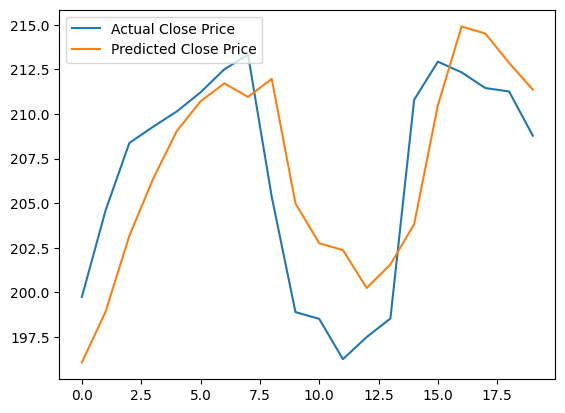

In [232]:
# Predict and inverse transform
# Predict on test data
predicted = model.predict(X_test)

# Because target was scaled, invert scaling for actual comparison
# We need to scale back only the 'Close' column values
# Extract scaling params for the Close price
close_min = scaler.data_min_[features.index(target)]
close_max = scaler.data_max_[features.index(target)]

def inverse_scale(scaled_value, min_val, max_val):
    return scaled_value * (max_val - min_val) + min_val

y_test_actual = inverse_scale(y_test, close_min, close_max)
predicted_actual = inverse_scale(predicted.flatten(), close_min, close_max)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_actual))
print(f"Test RMSE: {rmse}")

# Plot results
import matplotlib.pyplot as plt
plt.plot(y_test_actual, label='Actual Close Price')
plt.plot(predicted_actual, label='Predicted Close Price')
plt.legend()
plt.show()


In [197]:
new_df

,Date,sentiment_score,Open,High,Low,Close,Adj Close,Volume
155,2024-04-02,0.898807,169.08,169.34,168.23,168.84,167.83,49329500
154,2024-04-03,0.966832,168.79,170.68,168.58,169.65,168.63,47691700
153,2024-04-04,0.979128,170.29,171.92,168.82,168.82,167.81,53704400
152,2024-04-05,0.988349,169.59,170.39,168.95,169.58,168.56,42055200
151,2024-04-08,0.687555,169.03,169.20,168.24,168.45,167.44,37425500
...,...,...,...,...,...,...,...,...
4,2025-05-13,0.888783,210.43,213.40,209.00,212.93,212.93,51909300
3,2025-05-14,0.940153,212.43,213.94,210.58,212.33,212.33,49325800
2,2025-05-15,0.949249,210.95,212.96,209.54,211.45,211.45,45029500
1,2025-05-16,0.961058,212.36,212.57,209.77,211.26,211.26,54737900
